In [15]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
# download the data from a URL
# source: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
# alternate URL: https://lazyprogrammer.me/course_files/exercises/boston.txt
#!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
!wget https://lazyprogrammer.me/course_files/exercises/boston.txt

--2021-07-26 13:13:37--  https://lazyprogrammer.me/course_files/exercises/boston.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘boston.txt’

boston.txt              [ <=>                ]  50.05K  --.-KB/s    in 0.01s   

2021-07-26 13:13:37 (4.86 MB/s) - ‘boston.txt’ saved [51256]



In [3]:
# check if the data has a header
!head boston.txt

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town


In [4]:
# read the file, and separate the lines.
with open('boston.txt', 'r') as f:
    text = [line for line in f.readlines()]

# starting from first row of data, remove \n from even numbered rows,
# and append the next row to it.
start_row = 22
new_rows = []
for i,l in enumerate(text[start_row:]):
    if not i%2:
        newl = l.strip('\n')+text[start_row+i+1]
        new_rows.append(newl)

new_data = ''.join(new_rows)

# finally save the data.
with open('boston_new.txt', 'w') as f:
    f.write(new_data)

In [5]:
!ls

boston_new.txt	boston.txt  sample_data


In [6]:
!head boston_new.txt

 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30  396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80  396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80  392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70  394.63   2.94  33.40
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70  396.90   5.33  36.20
 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70  394.12   5.21  28.70
 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20  395.60  12.43  22.90
 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20  396.90  19.15  27.10
 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20  386.63  29.93  16.50
 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20  386.71  17.10  18.90


In [7]:
df = pd.read_csv('boston_new.txt', header= None, delimiter='\s+')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


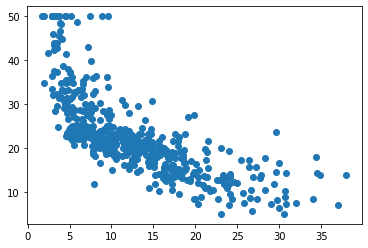

In [10]:
X= df.LSTAT
Y= df.MEDV
plt.scatter(X, Y)

In [16]:
data = df[df.columns[:-1]]
data = data.apply(
    lambda x: (x - x.mean()) / x.std()
)

data['MEDV'] = df.MEDV

In [18]:
X = data.drop('MEDV', axis=1).to_numpy()
Y = data['MEDV'].to_numpy()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [20]:
print(torch.__version__)

1.9.0+cu102


In [21]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)

In [27]:
# We use nn.Sequential defines a neural network with one layer and initialize it.
# Only two parameters are accepted by nn.Linear, which are the dimension of weight and the dimension of output respectively.
# Parameters don’t need to be initialized in our examination because Linear will do it automatically.
w_num = X_train.shape[1]
net = torch.nn.Sequential(
    torch.nn.Linear(w_num, 1)
)

torch.nn.init.normal_(net[0].weight, mean=0, std=0.1)
torch.nn.init.constant_(net[0].bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

In [22]:
# DataLoader is implemented in PyTorch, which will return an iterator to iterate training data by batch. 
# It’s easy to use, let’s start from constructing a Dataset of Tensor.
datasets = torch.utils.data.TensorDataset(X_train, Y_train)

In [25]:
#batch_size is the size of each batch in which data returned. 
# Data will be returned in random sequence if shuffle is True.
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

In [11]:
model = nn.Linear(13,1)

In [23]:
# Loss and optimizer
# We must define loss function before training the neural network, here we use Mean Square Error(MSE).
# After that, optimize the neural network by stochastic gradient descent.
# Here 0.05 is the learning rate.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [29]:
# Train the training set for 5 epochs. The training process is roughly as follows.
# Load a batch of data.
# Predict the batch of the data through net.
# Calculate the loss value by predict value and true value.
# Clear the grad value optimizer stored.
# Backpropagate the loss value.
# Update optimizer.

num_epochs = 5
for epoch in range(num_epochs):
    for x, y in train_iter:
        output = net(x)
        l = criterion(output, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, l.item()))

epoch 1 loss: 934.5658
epoch 2 loss: 800.6470
epoch 3 loss: 331.8959
epoch 4 loss: 460.1165
epoch 5 loss: 1192.4448


In [31]:
print(criterion(net(X_test), Y_test).item())

532.9641723632812


In [36]:
# Another way to train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(x)
  loss = criterion(outputs, y)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 1192.3379
Epoch 2/30, Loss: 616.8077
Epoch 3/30, Loss: 323.4996
Epoch 4/30, Loss: 170.1786
Epoch 5/30, Loss: 89.6570
Epoch 6/30, Loss: 47.3287
Epoch 7/30, Loss: 25.0701
Epoch 8/30, Loss: 13.3609
Epoch 9/30, Loss: 7.1972
Epoch 10/30, Loss: 3.9490
Epoch 11/30, Loss: 2.2336
Epoch 12/30, Loss: 1.3243
Epoch 13/30, Loss: 0.8392
Epoch 14/30, Loss: 0.5773
Epoch 15/30, Loss: 0.4331
Epoch 16/30, Loss: 0.3510
Epoch 17/30, Loss: 0.3020
Epoch 18/30, Loss: 0.2706
Epoch 19/30, Loss: 0.2487
Epoch 20/30, Loss: 0.2321
Epoch 21/30, Loss: 0.2185
Epoch 22/30, Loss: 0.2067
Epoch 23/30, Loss: 0.1961
Epoch 24/30, Loss: 0.1863
Epoch 25/30, Loss: 0.1772
Epoch 26/30, Loss: 0.1686
Epoch 27/30, Loss: 0.1604
Epoch 28/30, Loss: 0.1527
Epoch 29/30, Loss: 0.1454
Epoch 30/30, Loss: 0.1384


In [37]:
print(criterion(net(X_test), Y_test).item())

532.9641723632812
